# Analysis

Analysis notebook of our output results

In [1]:
import sys
import os
import glob
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import plotly.graph_objects as go
import plotly.express as px

sys.path.append(os.path.join(os.getcwd(), 'util'))
from makePlots import *

plt.style.use(os.path.join(os.getcwd(), 'charging-network.mplstyle'))


Bad key axes.style in file /home/nfranz/school/DataScienceTeamProject/SCDV490-Final/charging-network.mplstyle, line 4 ('axes.style         : ggplot')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key axes.style in file /home/nfranz/school/DataScienceTeamProject/SCDV490-Final/charging-network.mplstyle, line 4 ('axes.style         : ggplot')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.1/matplotlibrc.template
or from the matplotlib source distribution


### Plot Heatmap for Rhode Island Nodes as a test

In [2]:
# load in the data
picklepath = os.path.join('data', 'pickle')
csvpath = os.path.join('data', 'csvs')
pickles = glob.glob(os.path.join(picklepath, '*.pkl'))
csvs = glob.glob(os.path.join(csvpath, '*.csv'))

networkNodes = []
allNodes = []
centers = []
tot = len(csvs)
stateNames = []
nodesNY = None
centersNY = None
for ii in range(tot):
    csv = csvs[ii]
    pkl = pickles[ii]
    
    # read in the csv for this state
    df = pd.read_csv(csv)
    stateName = os.path.split(csv)[-1].replace('-out.csv', '')
    df['state_name'] = [stateName] * len(df)
    networkNodes.append(df)
    
    # read in the pickle file for this state
    with open(pkl, 'rb') as f:
        data = np.array(pickle.load(f), dtype=object)
    
    centers.append(np.array([np.array(d) for d in data[:,0]]))
    allNodes.append(data[:,1])
    stateNames.append(stateName)
    
    if stateName == 'new-york':
        centersNY = np.array([np.array(d) for d in data[:,0]])
        nodesNY = data[:,1]
        
# reformat data
netNodes = pd.concat(networkNodes).reset_index()

allCenters = np.concatenate(centers)
nodes = np.concatenate(allNodes)

In [62]:
print(np.unique(stateNames))

['alabama' 'arizona' 'arkansas' 'california' 'colorado' 'connecticut'
 'delaware' 'district-of-columbia' 'florida' 'georgia' 'idaho' 'illinois'
 'indiana' 'iowa' 'kansas' 'kentucky' 'louisiana' 'maine' 'maryland'
 'massachusetts' 'michigan' 'minnesota' 'mississippi' 'missouri' 'montana'
 'nebraska' 'nevada' 'new-hampshire' 'new-jersey' 'new-mexico' 'new-york'
 'north-carolina' 'north-dakota' 'ohio' 'oklahoma' 'oregon' 'pennsylvania'
 'rhode-island' 'south-carolina' 'south-dakota' 'tennessee' 'texas' 'utah'
 'vermont' 'virginia' 'washington' 'west-virginia' 'wisconsin' 'wyoming']


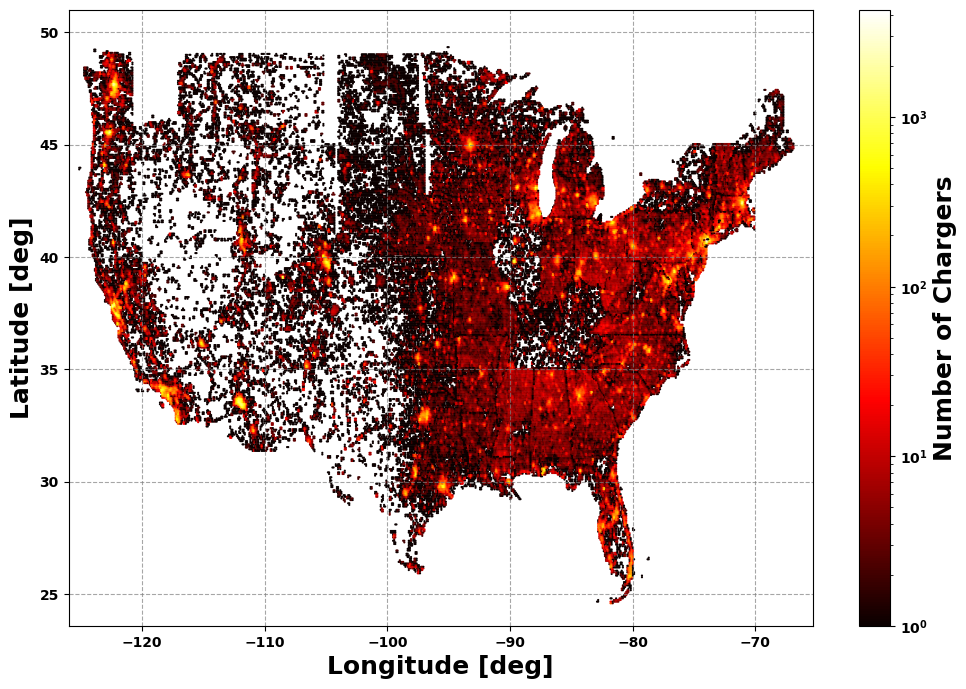

In [3]:
# create a heatmap of all of the nodes in the dataset
fig, ax = plt.subplots()
s = 10
n = np.array([len(row) for row in nodes])
plotHeatMap(n, allCenters, os.path.join(os.getcwd(), 'US-heatmap.png'), fig=fig, marker='.', s=s, lw=0, cmap='hot')
ax.set_ylim(np.min(allCenters[:,0])-1, 51)
ax.set_xlim(-126, np.max(allCenters[:,1])+1)
fig.savefig('US-heatmap.png')

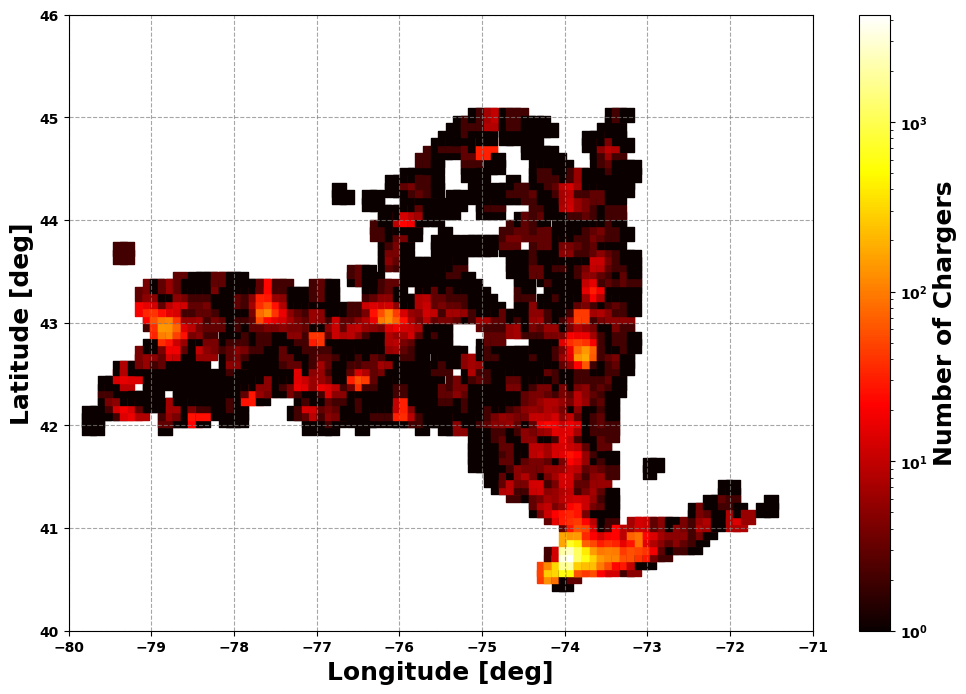

In [23]:
state = 'new-york'
csvPath = os.path.join(os.getcwd(), 'data', 'csvs', f'{state}-out.csv')
pklPath = os.path.join(os.getcwd(), 'data', 'pickle', f'{state}-out.pkl')
csv, nodes, centers = io(csvPath, pklPath)

n = [len(row) for row in nodes]

lat = centers[:,0]
long = centers[:,1]

fig, ax = plt.subplots()
    
im = ax.scatter(long, lat, c=n, norm=LogNorm(), marker='s', s=100, cmap='hot')
fig.colorbar(im, label='Number of Chargers')
ax.set_ylabel('Latitude [deg]')
ax.set_xlabel('Longitude [deg]')
ax.set_xlim(-80, -71)
ax.set_ylim(40, 46)
fig.savefig('NY-heatmap.png')

Text(0.5, 0, 'State Name')

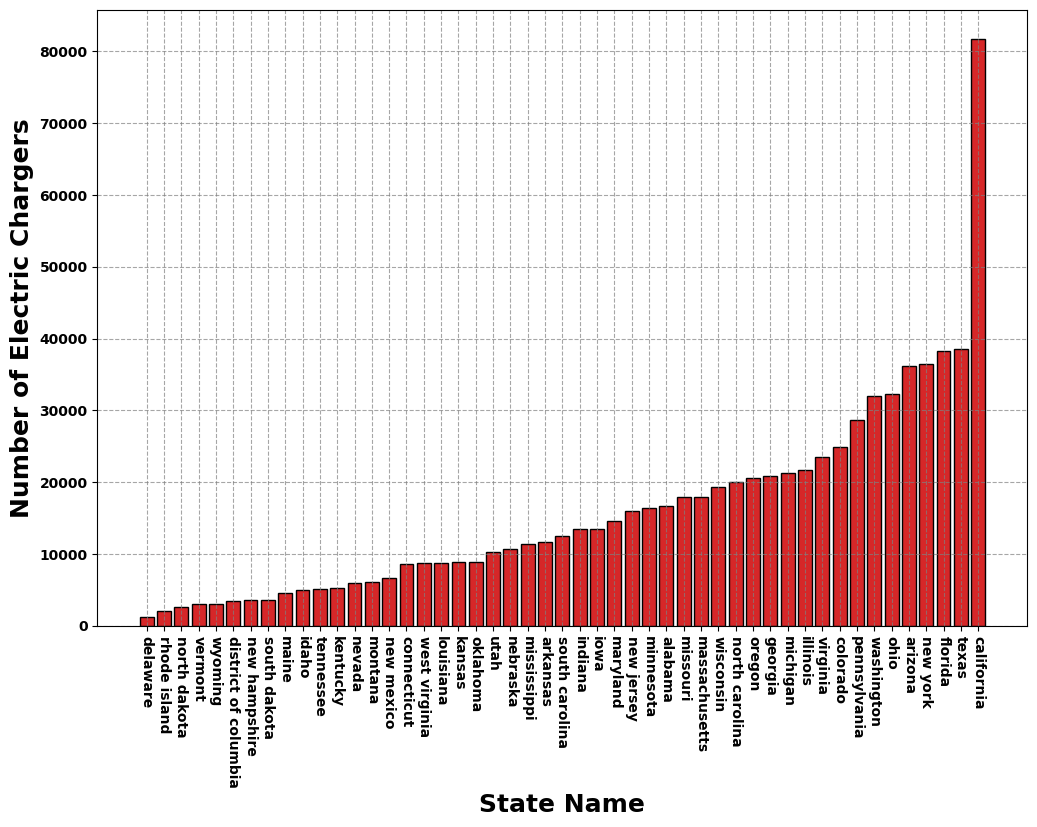

In [106]:
# histogram number of chargers per state
fig, ax = plt.subplots()

group = netNodes.groupby('state_name')

count = np.array(group.state_name.count())
totals = np.sort(count)
idx = np.argsort(count)
stateNames = np.array(np.concatenate(group.state_name.unique()))[np.argsort(count)]
xticks = [s.replace('-', ' ') for s in stateNames]

bins = np.arange(len(xticks))
ax.bar(bins, height=totals, edgecolor='k', tick_label=xticks)
ax.set_xticklabels(xticks, rotation=-90)
ax.set_ylabel('Number of Electric Chargers')
ax.set_xlabel('State Name')

In [111]:
# generate some state
nChargers = len(netNodes)
print(f'Number of Chargers: {nChargers}')

nUsesPerDay = 24 # assumes half hour charging time and 24 hours of charging per day
nChargersPerSite = 10
nPeople = nChargers*nUsesPerDay*nChargersPerSite
print(f'Number of Uses Per Day: {nPeople}')

usPop = 334679458
print(f'Fraction of US population that can use a public charger: {(nPeople/usPop)*100}')

Number of Chargers: 784801
Number of Uses Per Day: 188352240
Fraction of US population that can use a public charger: 56.278398777614846
